In [1]:
import numpy as np
from scipy.ndimage import zoom
from sklearn.metrics.pairwise import cosine_similarity
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (10., 6.)

In [2]:
dg_rolling = np.load('dg-rolling-sentiment.npy')
sm_rolling = np.load('sm-rolling-sentiment.npy')
cc_rolling = np.load('cc-rolling-sentiment.npy')
pp_rolling = np.load('pp-rolling-sentiment.npy')

In [3]:
max_length = max(len(dg_rolling), len(sm_rolling), len(pp_rolling), len(cc_rolling))

In [4]:
dg_zoom_rate = max_length / len(dg_rolling)
sm_zoom_rate = max_length / len(sm_rolling)
cc_zoom_rate = max_length / len(cc_rolling)
pp_zoom_rate = max_length / len(pp_rolling)

dg_rolling_zoomed = zoom(dg_rolling, dg_zoom_rate)
sm_rolling_zoomed = zoom(sm_rolling, sm_zoom_rate)
cc_rolling_zoomed = zoom(cc_rolling, cc_zoom_rate)
pp_rolling_zoomed = zoom(pp_rolling, pp_zoom_rate)

In [5]:
all_aligned = np.array([dg_rolling_zoomed, sm_rolling_zoomed, cc_rolling_zoomed, pp_rolling_zoomed])

pairwise_cosine_similarity = cosine_similarity(all_aligned, all_aligned)

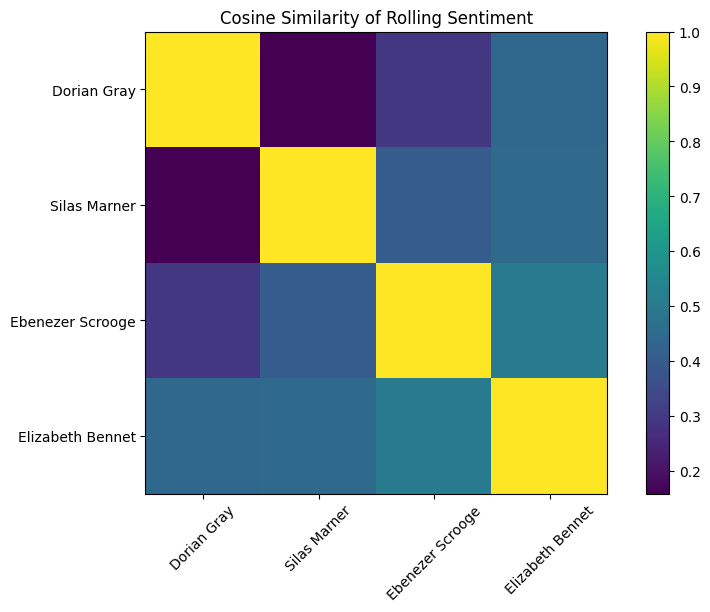

In [6]:
fig, ax = plt.subplots()
pos = ax.imshow(pairwise_cosine_similarity)
ax.set_xticks(np.arange(4))
ax.set_yticks(np.arange(4))
ax.set_xticklabels(['Dorian Gray', 'Silas Marner', 'Ebenezer Scrooge', 'Elizabeth Bennet'], rotation=45)
ax.set_yticklabels(['Dorian Gray', 'Silas Marner', 'Ebenezer Scrooge', 'Elizabeth Bennet'])
ax.set_title('Cosine Similarity of Rolling Sentiment')
fig.colorbar(pos, ax=ax)
plt.savefig('cosine_sim_sentiment.png')
plt.show()

In [7]:
pairwise_cosine_similarity

array([[1.        , 0.15834078, 0.29406656, 0.44160199],
       [0.15834078, 1.        , 0.40335082, 0.44807839],
       [0.29406656, 0.40335082, 1.        , 0.50447799],
       [0.44160199, 0.44807839, 0.50447799, 1.        ]])